In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# descriptive analysis

In [3]:
df.shape

(1014, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [42]:
df.apply(pd.Series.nunique)

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

In [6]:
for col in df.columns:
    num_unique_value =df[col].nunique()
    print(f'number of unique values in {col} : {num_unique_value}')

number of unique values in Age : 50
number of unique values in SystolicBP : 19
number of unique values in DiastolicBP : 16
number of unique values in BS : 29
number of unique values in BodyTemp : 8
number of unique values in HeartRate : 16
number of unique values in RiskLevel : 3


In [7]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

# eliminate duplicate

In [8]:
duplicate = df[df.duplicated()]
cleaned_df = df.drop_duplicates()

# labelencoder

In [9]:
labelencoder = LabelEncoder()
cleaned_df['RiskLevel'] = labelencoder.fit_transform(cleaned_df['RiskLevel'])
cleaned_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,2
674,15,100,60,6.0,98.0,80,1
703,15,100,49,7.6,98.0,77,1
704,12,100,50,6.0,98.0,70,2


In [10]:
df_catogorical = cleaned_df['RiskLevel']
df_numerical = cleaned_df[['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']]

# univariate analysis

boxplot

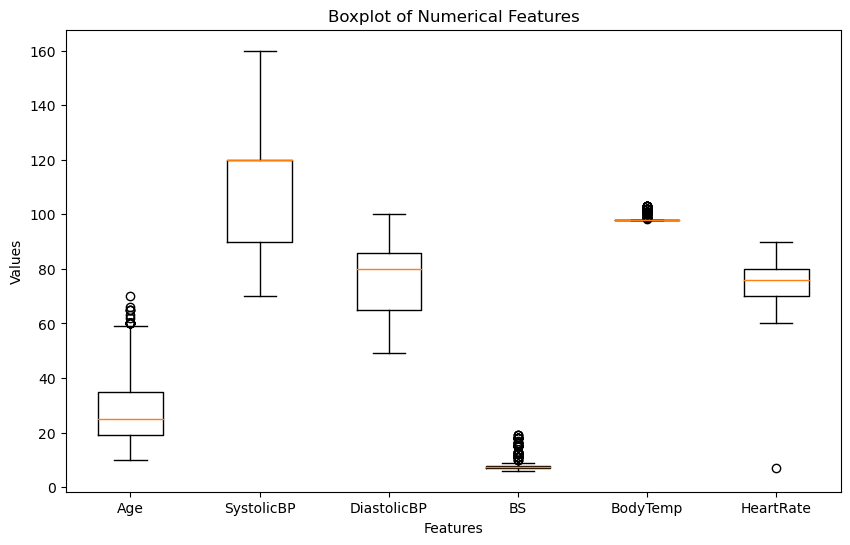

In [11]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_numerical.values, labels=df_numerical.columns)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

# histogram

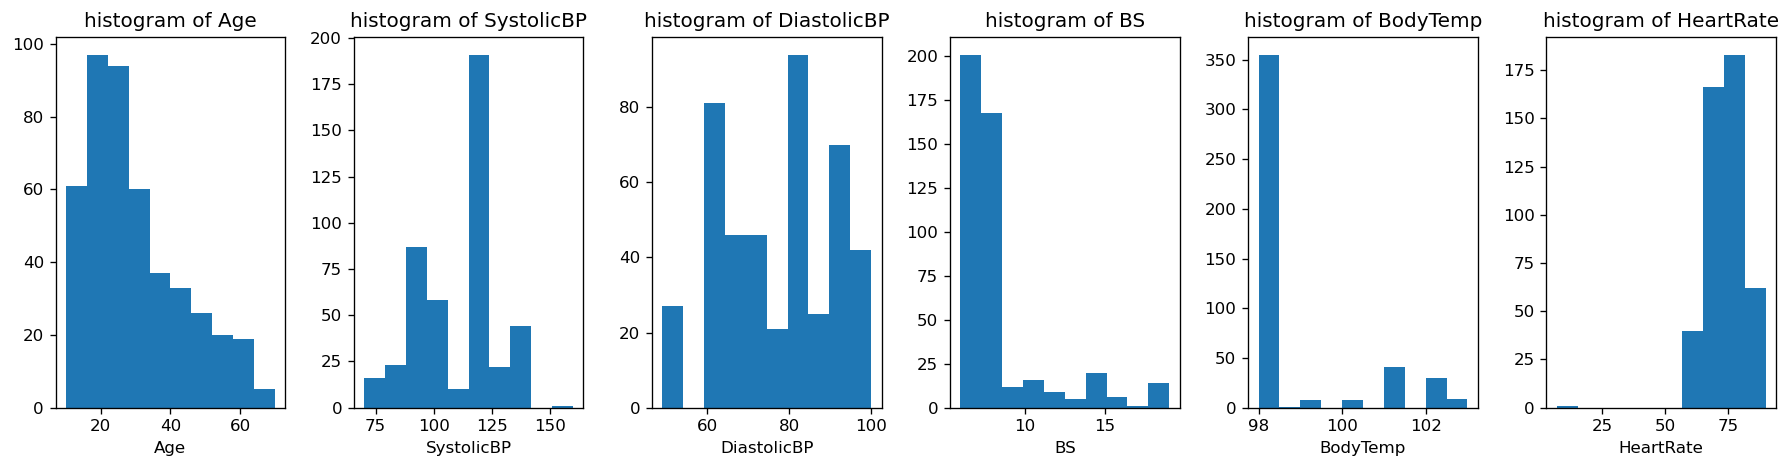

In [12]:
plt.figure(figsize=(15,4),dpi=120)
for i,column in enumerate(df_numerical.columns):
    plt.subplot(1,len(df_numerical.columns),i+1)
    plt.hist(df_numerical[column])
    plt.title(f'histogram of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

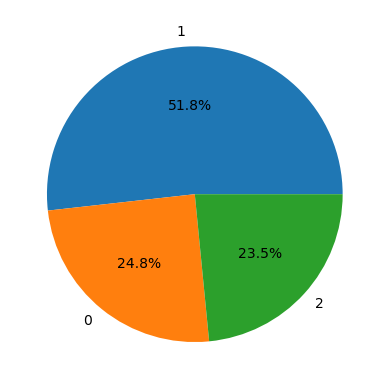

In [13]:
plt.figure()
plt.subplot()
risk_count = cleaned_df['RiskLevel'].value_counts()
plt.pie(risk_count,labels=risk_count.index,autopct='%1.1f%%')
plt.show()

# bivariate analysis

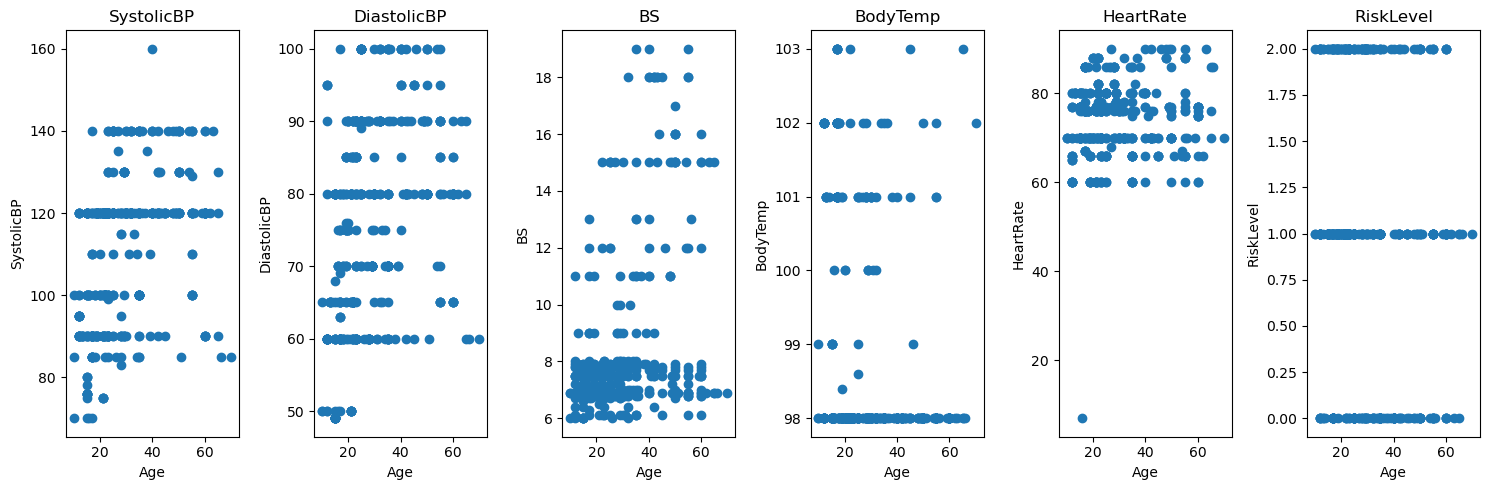

In [14]:
fig, axes = plt.subplots(1, len(cleaned_df.columns)-1, figsize=(15, 5))

for i, column in enumerate(cleaned_df.columns):
    if column != 'Age':
        ax = axes[i-1] if len(cleaned_df.columns) > 2 else axes
        ax.scatter(cleaned_df['Age'], cleaned_df[column])
        ax.set_xlabel('Age')
        ax.set_ylabel(column)
        ax.set_title(column)

plt.tight_layout()
plt.show()


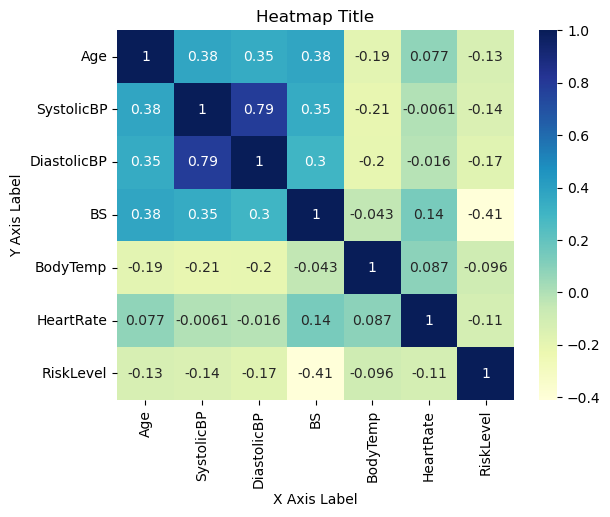

In [15]:
corr = cleaned_df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Heatmap Title')
plt.show()

# one-hot encoding

In [16]:
one_hot_encoding = pd.get_dummies(cleaned_df['RiskLevel'])
new_title=one_hot_encoding.rename(columns={0: "high risk", 1: "low risk", 2: "mid risk"})
age_df = cleaned_df['Age']
age_risk = pd.concat([new_title, age_df],axis=1)
final= new_title[['high risk', 'low risk', 'mid risk']].replace({True: 1, False: 0})
age_risk = pd.concat([final,age_df],axis=1)
age_risk

,high risk,low risk,mid risk,Age
0,1,0,0,25
1,1,0,0,35
2,1,0,0,29
3,1,0,0,30
4,0,1,0,35
...,...,...,...,...
673,0,0,1,12
674,0,1,0,15
703,0,1,0,15
704,0,0,1,12


Text(0.5, 1.0, 'Count of high risk by Age')

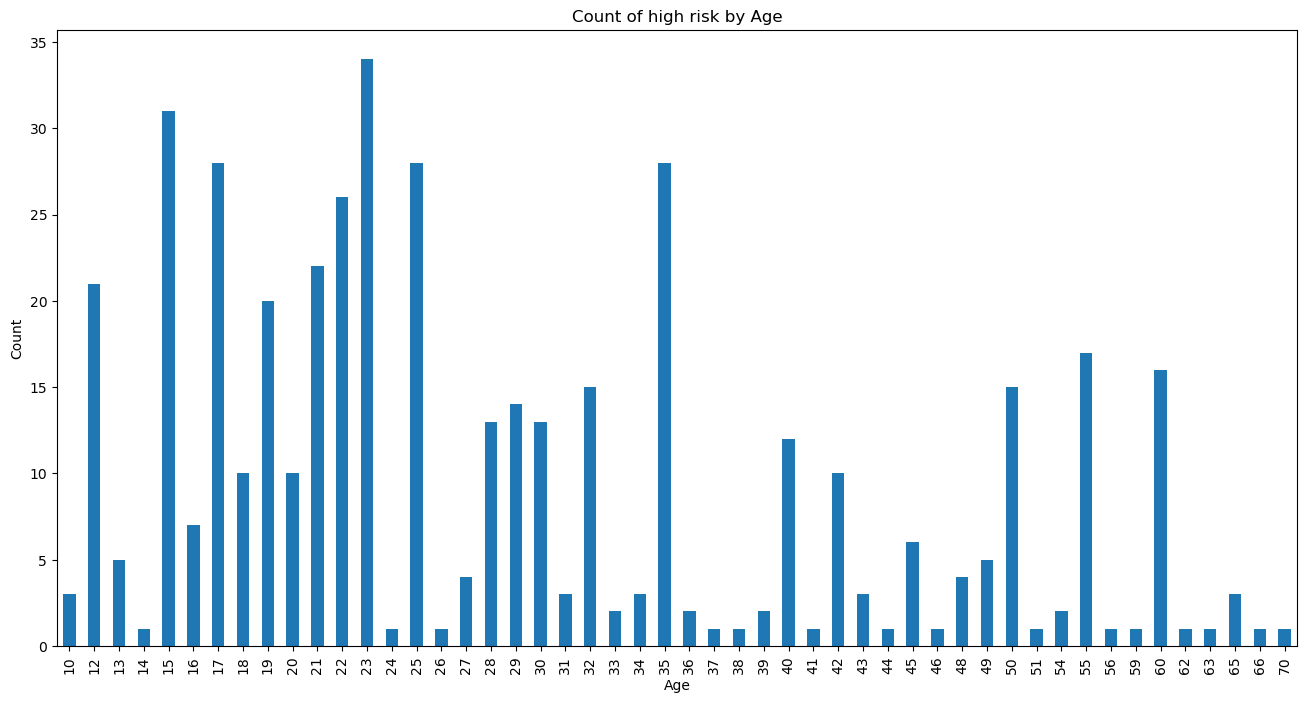

In [17]:
plt.figure(figsize=(16,8))
age_risk.groupby('Age')['high risk'].count().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of high risk by Age')

Text(0.5, 1.0, 'Count of low risk by Age')

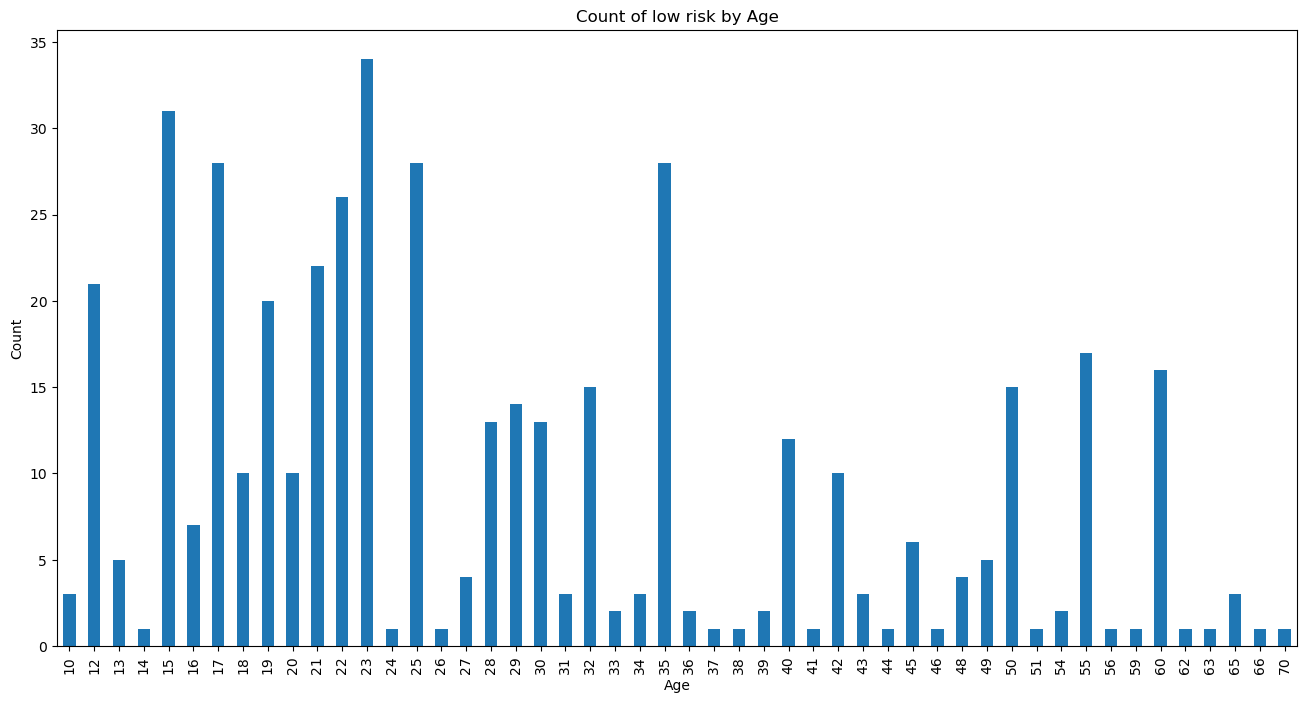

In [18]:
plt.figure(figsize=(16,8))
age_risk.groupby('Age')['low risk'].count().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of low risk by Age')


Text(0.5, 1.0, 'Count of low risk by Age')

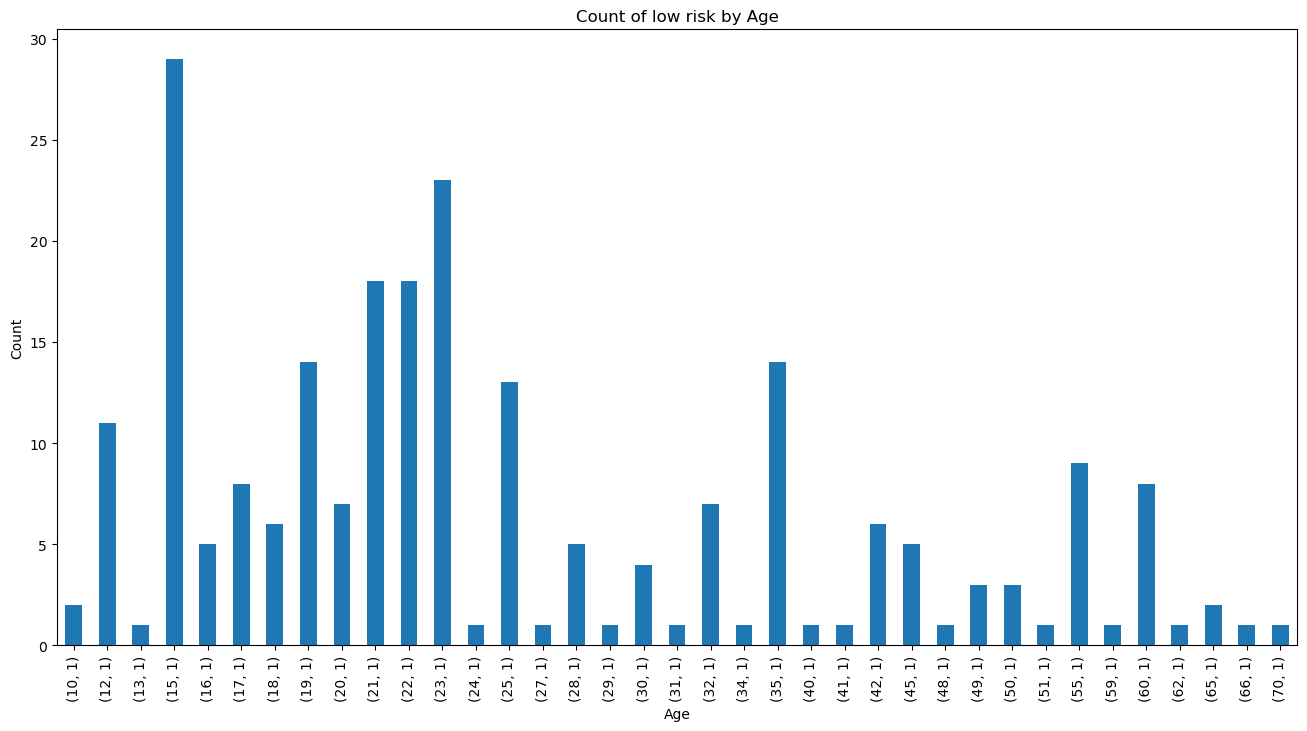

In [19]:
filtered_df =age_risk[age_risk['low risk'] == 1]
plt.figure(figsize=(16,8))
filtered_df.groupby('Age')['low risk'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of low risk by Age')


Text(0.5, 1.0, 'Count of high risk by Age')

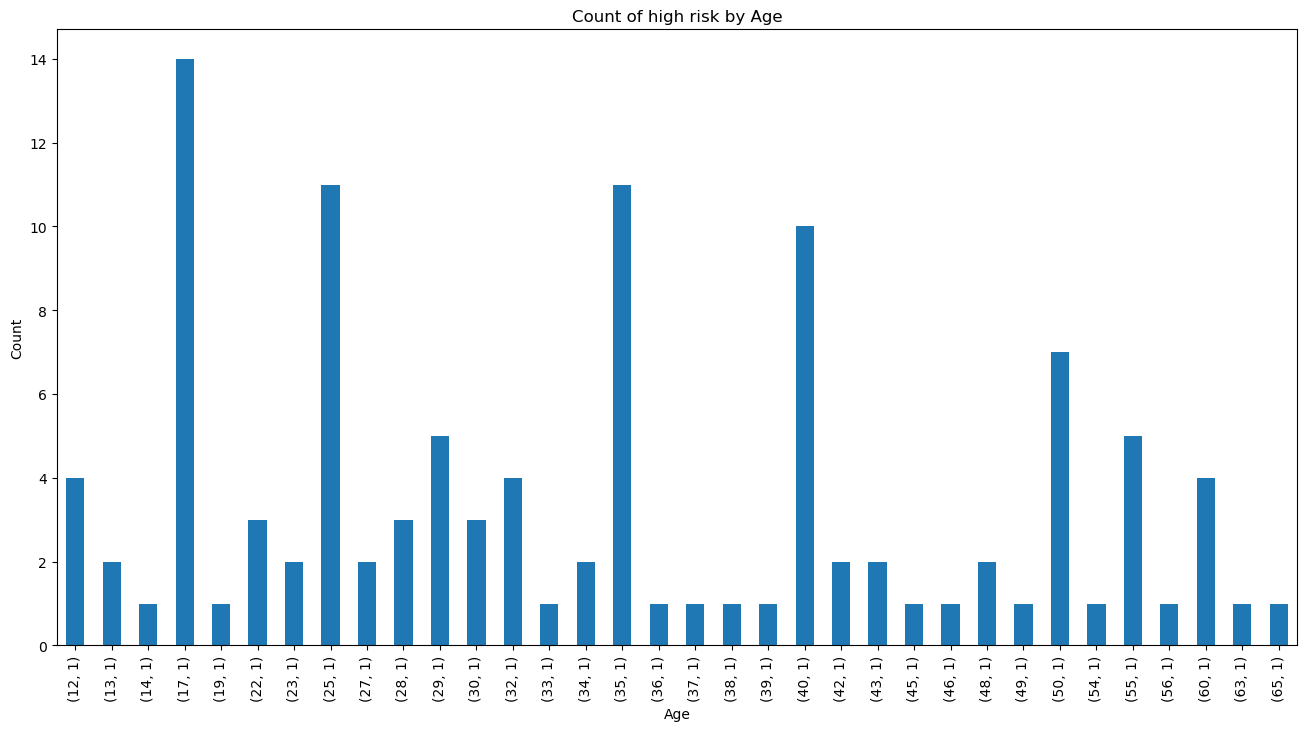

In [20]:
filtered_df_high =age_risk[age_risk['high risk'] == 1]
plt.figure(figsize=(16,8))
filtered_df_high.groupby('Age')['high risk'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of high risk by Age')


Text(0.5, 1.0, 'Count of mid risk by Age')

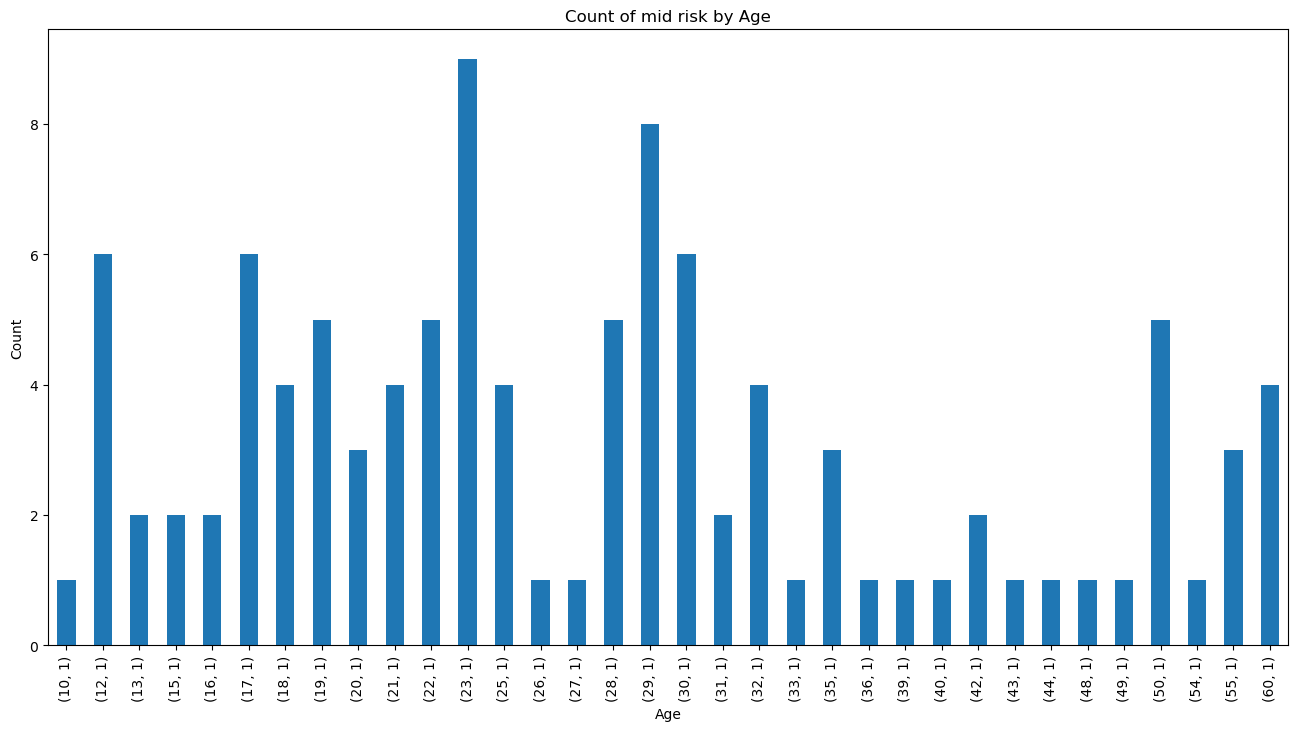

In [21]:
filtered_df_mid =age_risk[age_risk['mid risk'] == 1]
plt.figure(figsize=(16,8))
filtered_df_mid.groupby('Age')['mid risk'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of mid risk by Age')

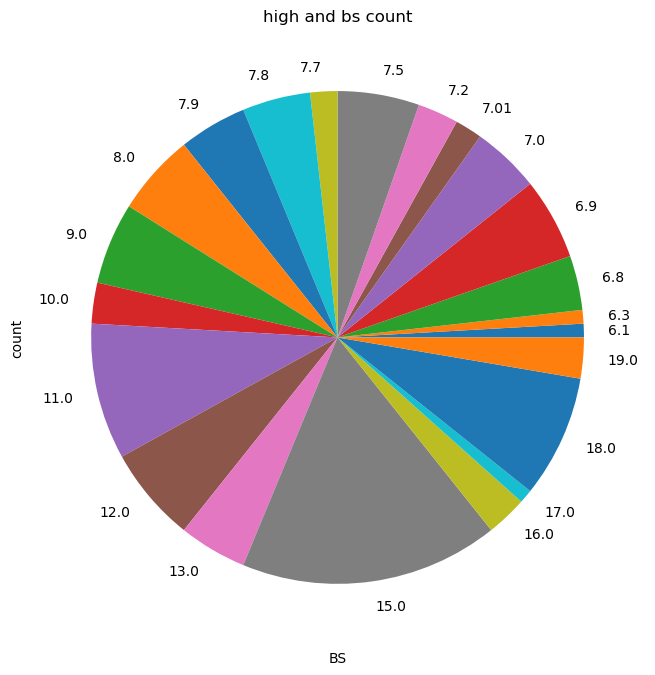

In [22]:
bs_risklevel=pd.concat([age_risk,df['BS']],axis=1)
bs_risklevel.drop('Age',axis=1,inplace=True)
#bs_risklevel.groupby('BS')['high risk'].value_counts()
filtered_bs = bs_risklevel[bs_risklevel['high risk'] == 1]
plt.figure(figsize=(16,8))
filtered_bs.groupby('BS')['high risk'].count().plot(kind='pie')
plt.xlabel('BS')
plt.ylabel('count')
plt.title('high and bs count')
plt.show()

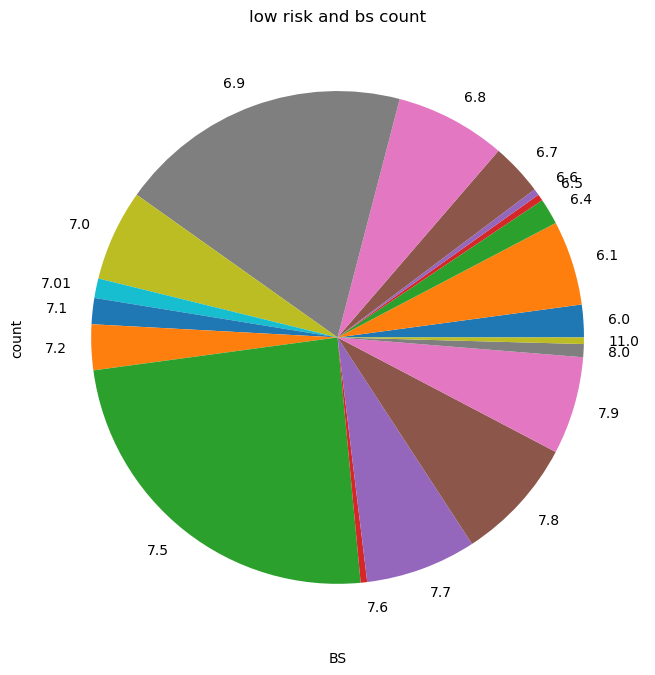

In [23]:
filtered_bs_low = bs_risklevel[bs_risklevel['low risk'] == 1]
plt.figure(figsize=(16,8))
filtered_bs_low.groupby('BS')['low risk'].count().plot(kind='pie')
plt.xlabel('BS')
plt.ylabel('count')
plt.title('low risk and bs count')
plt.show()

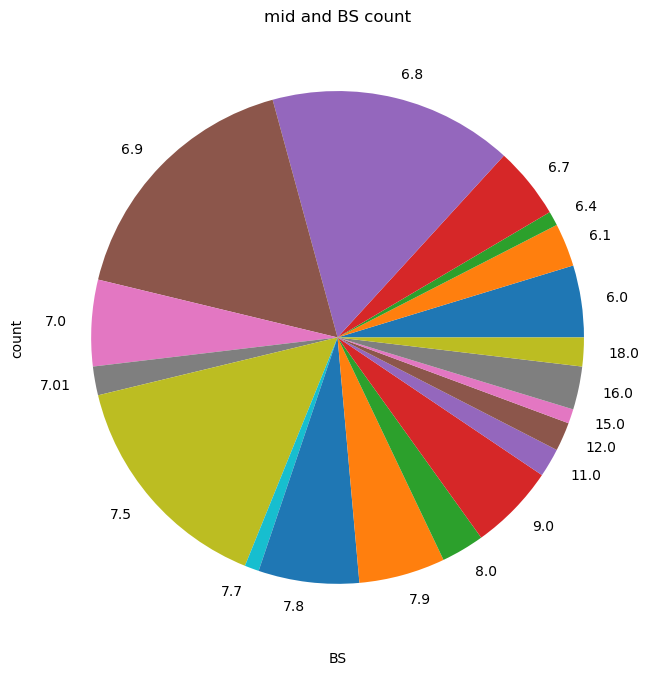

In [24]:
filtered_bs_mid = bs_risklevel[bs_risklevel['mid risk'] == 1]
plt.figure(figsize=(16,8))
filtered_bs_mid.groupby('BS')['mid risk'].count().plot(kind='pie')
plt.xlabel('BS')
plt.ylabel('count')
plt.title('mid and BS count')
plt.show()

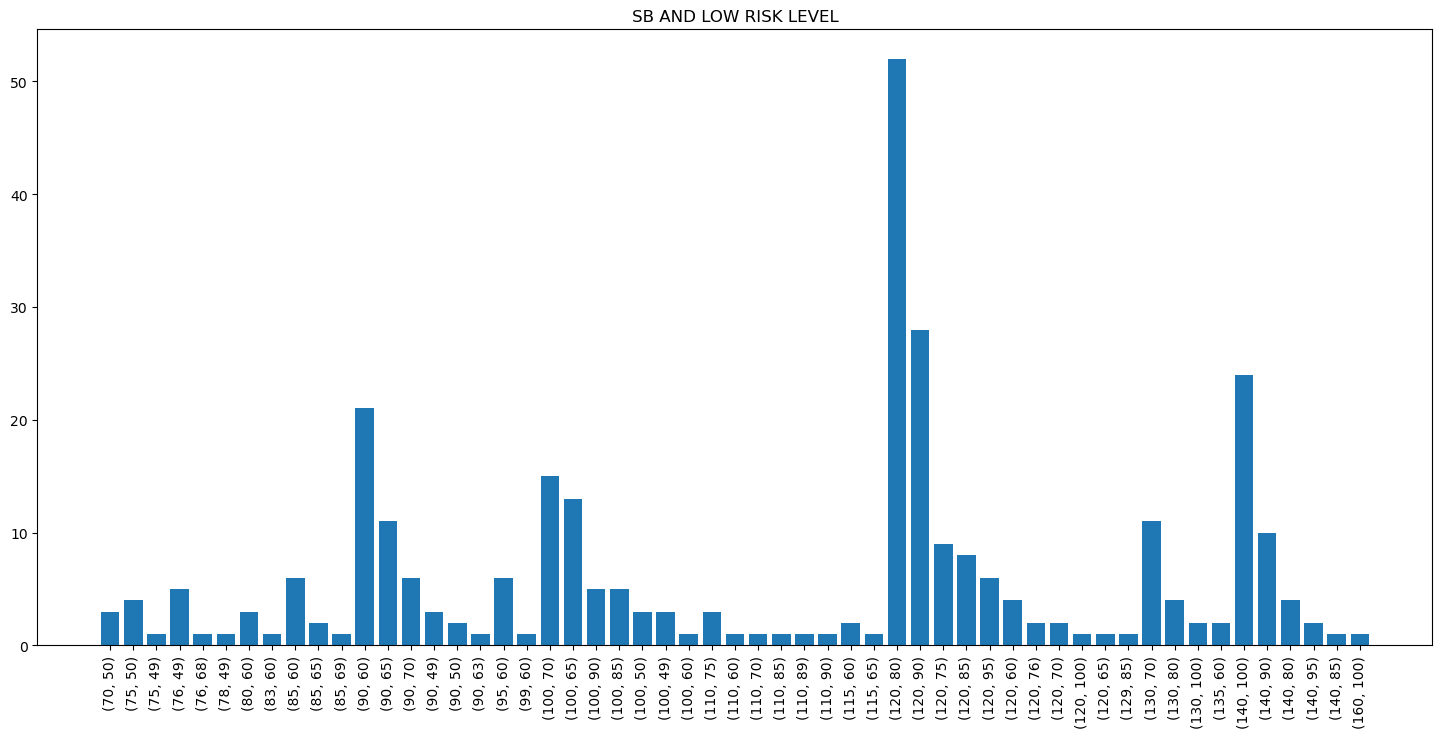

In [25]:
ds_df=df.groupby('DiastolicBP')['SystolicBP'].value_counts().reset_index(name='count')
sdr_df=cleaned_df.groupby('SystolicBP')[['DiastolicBP','RiskLevel']].value_counts().reset_index(name='count')
sdr_df['BP_Combined'] = '(' + sdr_df['SystolicBP'].astype(str) + ', ' + sdr_df['DiastolicBP'].astype(str) + ')'
plt.figure(figsize=(18,8))
sdr_1=sdr_df[(sdr_df['RiskLevel'] == 1)]
plt.bar(sdr_df['BP_Combined'],sdr_df['count'])
plt.xticks(rotation='vertical')
plt.title('SB AND LOW RISK LEVEL')
plt.show()

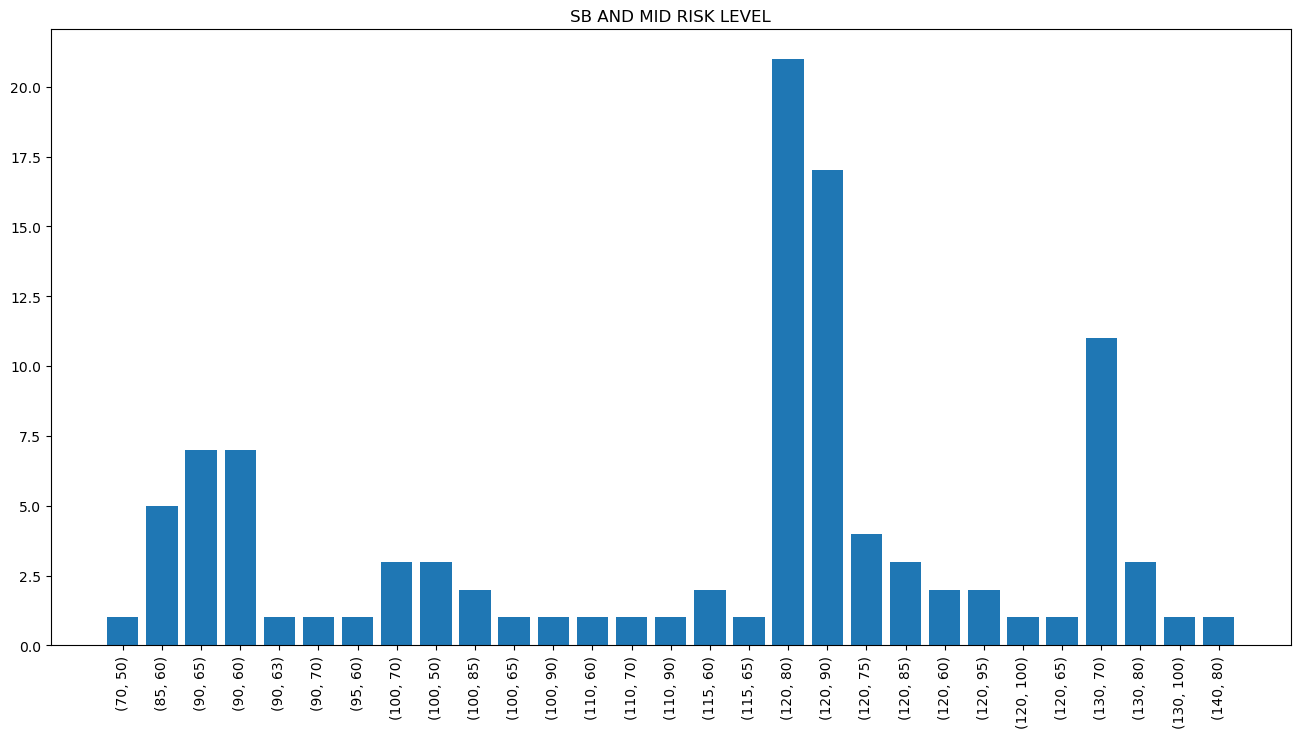

In [26]:
plt.figure(figsize=(16,8))
sdr_2=sdr_df[(sdr_df['RiskLevel'] == 2)]
plt.bar(sdr_2['BP_Combined'],sdr_2['count'])
plt.xticks(rotation='vertical') 
plt.title('SB AND MID RISK LEVEL')
plt.show()

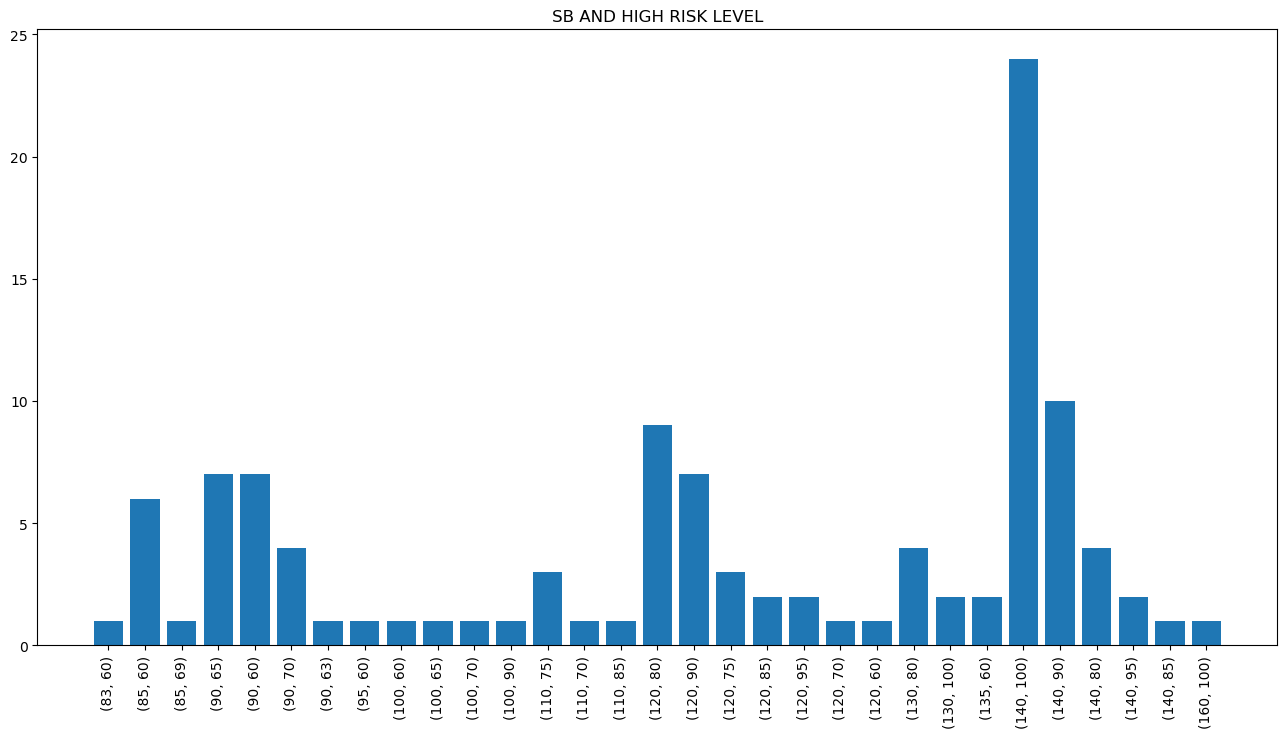

In [27]:
plt.figure(figsize=(16,8))
sdr_0=sdr_df[(sdr_df['RiskLevel'] == 0)]
plt.bar(sdr_0['BP_Combined'],sdr_0['count'])
plt.xticks(rotation='vertical') 
plt.title('SB AND HIGH RISK LEVEL')
plt.show()

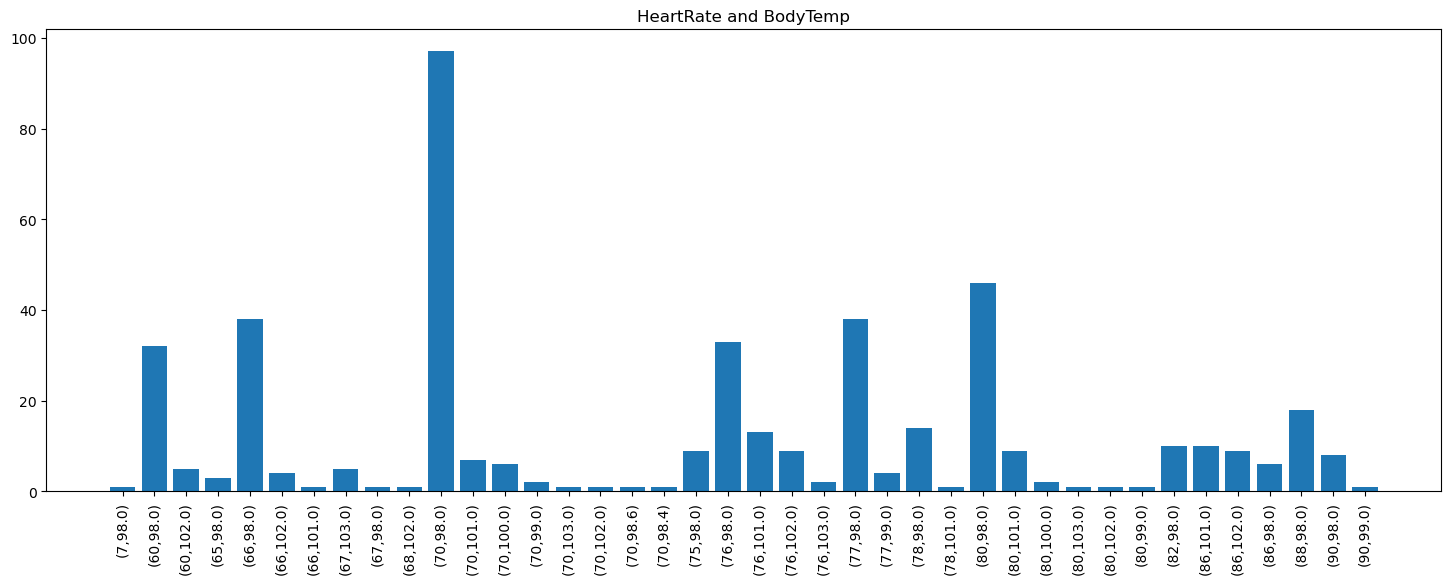

In [28]:
tem_rate=cleaned_df.groupby('HeartRate')['BodyTemp'].value_counts().reset_index()
tem_rate['temp_rate'] = "(" +tem_rate['HeartRate'].astype(str)+","+tem_rate['BodyTemp'].astype(str)+")"
plt.figure(figsize=(18,6))
plt.bar(tem_rate['temp_rate'],tem_rate['count'])
plt.xticks(rotation='vertical')
plt.title('HeartRate and BodyTemp')
plt.show()           

# binning age

<Axes: xlabel='AgeBin', ylabel='Proportion'>

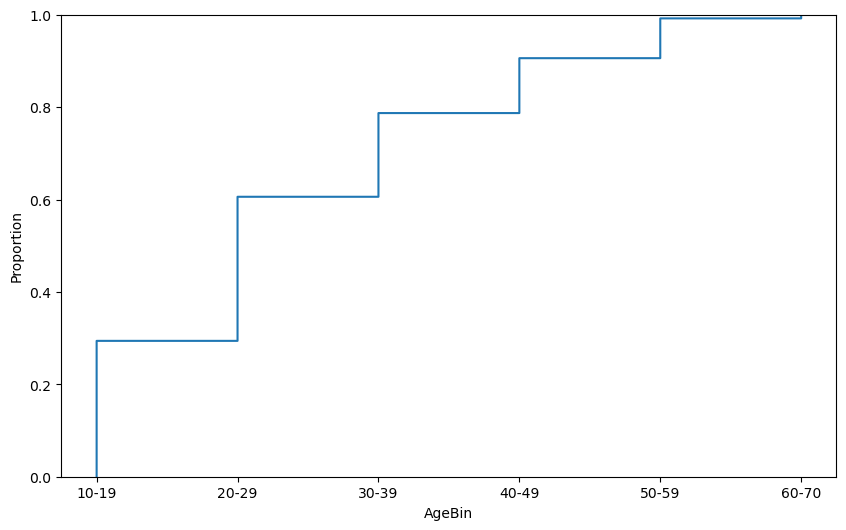

In [29]:
dfn=pd.read_csv('Maternal Health Risk Data Set.csv')
bins =[10,20,30,40,50,60,70]
bins_labels =['10-19','20-29','30-39','40-49','50-59','60-70']
dfn['AgeBin'] = pd.cut(dfn['Age'],bins=bins,labels=bins_labels)
plt.figure(figsize=(10,6))
sns.ecdfplot(dfn['AgeBin'])

<Figure size 4000x4000 with 0 Axes>

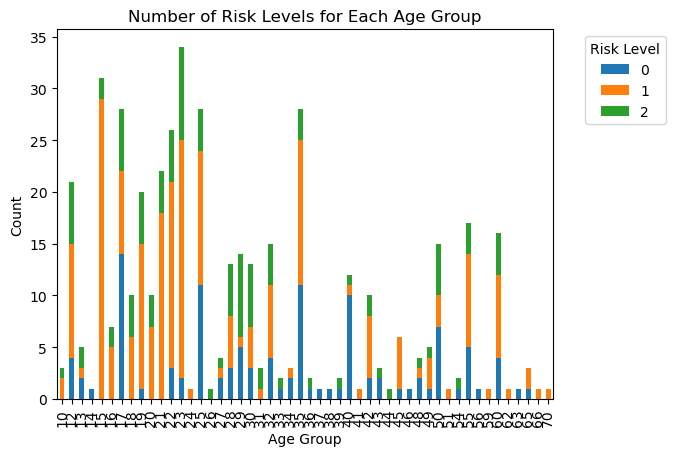

In [30]:
plt.figure(figsize=(40,40))
risk_counts_by_age = cleaned_df.groupby(['Age', 'RiskLevel']).size()
risk_counts_by_age = risk_counts_by_age.unstack(fill_value=0)
risk_counts_by_age.plot(kind='bar', stacked=True)
plt.title('Number of Risk Levels for Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

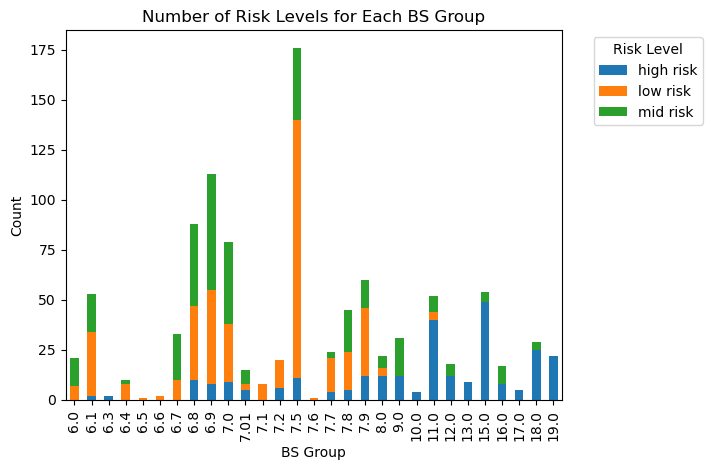

In [31]:
risk_counts_by_age = df.groupby(['BS', 'RiskLevel']).size()
risk_counts_by_age = risk_counts_by_age.unstack(fill_value=0)
risk_counts_by_age.plot(kind='bar', stacked=True)
plt.title('Number of Risk Levels for Each BS Group')
plt.xlabel('BS Group')
plt.ylabel('Count')
plt.legend(title='Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# knn model

In [32]:
x=cleaned_df.iloc[:,:6]
y=cleaned_df.iloc[:,-1]
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [33]:
model = KNeighborsClassifier(n_neighbors=34)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=34)

In [34]:
accuracy = model.score(x_test,y_test)
accuracy

0.5661764705882353

In [35]:
y_pred = model.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test,y_pred,rownames=['true'],colnames=['predicted'],margins=True)

predicted,0,1,2,All
true,,,,
0,12,20,0,32
1,0,63,2,65
2,1,36,2,39
All,13,119,4,136


# naive_bayes

In [36]:
model_nb =GaussianNB()
model_nb.fit(x_train,y_train)

GaussianNB()

In [37]:
accuracy = model_nb.score(x_test,y_test)
accuracy

0.6323529411764706

In [38]:
y_pred = model_nb.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test,y_pred,rownames=['true'],colnames=['predicted'],margins=True)

predicted,0,1,2,All
true,,,,
0,20,10,2,32
1,2,63,0,65
2,4,32,3,39
All,26,105,5,136


# logisticregression

In [39]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)

LogisticRegression()

In [40]:
accuracy = logReg.score(x_test,y_test)
accuracy

0.6470588235294118

In [41]:
y_pred = logReg.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test,y_pred,rownames=['true'],colnames=['predicted'],margins=True)

predicted,0,1,2,All
true,,,,
0,19,12,1,32
1,0,64,1,65
2,3,31,5,39
All,22,107,7,136
